First, download the dataset from the following link as .zip file:

https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af

Then, extract the zip file into a folder. You can then upload this dataset to your google drive folder or use it on any platform you want.

For more information about dataset, you can see this article:
The Article: https://arxiv.org/abs/1912.12142


## Downloading and Saving Dataset

In [119]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import RMSprop

In [ ]:
# Replace these paths with the actual paths to your dataset folders
data_dir = '/Users/xxx/Desktop/deep learning/lung_colon_image_set'
image_data = []
labels = []

folds = os.listdir(data_dir)

for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    # Check if foldpath is a directory before proceeding
    if os.path.isdir(foldpath):
        flist = os.listdir(foldpath)

        for f in flist:
            f_path = os.path.join(foldpath, f)
            if os.path.isdir(f_path):  # Add this check
                filelist = os.listdir(f_path)

                for file in filelist:
                    fpath = os.path.join(f_path, file)
                    try:
                        # Open the image using PIL (or you can use OpenCV) within a 'with' statement
                        with Image.open(fpath) as image:
                            # Resize images
                            im = image.resize((120,120), Image.LANCZOS)
                            # Append image and label to respective lists
                            image_data.append(np.array(im))
                    except Exception as e:
                        print(f"Error opening image '{fpath}': {e}")
                    # Assign the label of the images according to the folder they belong to.
                    if f == 'colon_aca':
                        labels.append('Colon adenocarcinoma')
                    elif f == 'colon_n':
                        labels.append('Colon Benign Tissue')
                    elif f == 'lung_aca':
                        labels.append('Lung adenocarcinoma')
                    elif f == 'lung_n':
                        labels.append('Lung Benign Tissue')
                    elif f == 'lung_scc':
                        labels.append('Lung Squamous Cell Carcinoma')

tr_labels = np.array(labels)
image_matrix = np.array([np.array(img) for img in image_data])

# Ensure you have the right path for saving
np.save("/Users/xxx/deep learning/data120.npy", image_matrix)
np.save("/Users/xxx/deep learning/labels120.npy", tr_labels)

Once you have saved the data and labels into a folder, you can call them from the related folder and use them in any way you want.

#Call data from directory

In [ ]:
file_dir = "/Users/xxx/deep learning/Assignment/"
data = np.load(file_dir + "data120.npy")
labels = np.load(file_dir + "labels120.npy", allow_pickle=True)
print(labels)

['Lung adenocarcinoma' 'Lung adenocarcinoma' 'Lung adenocarcinoma' ...
 'Colon adenocarcinoma' 'Colon adenocarcinoma' 'Colon adenocarcinoma']


# Preprocessing and EDA (Exploratory Data Analysis)


## Converting the Target Values to the One-Hot-Encoded Format

In [121]:
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
labels_reshaped = labels.reshape(-1, 1)
# convert labels
one_hot_labels = encoder.fit_transform(labels_reshaped)
print(one_hot_labels)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


## Visualizing Sample Images

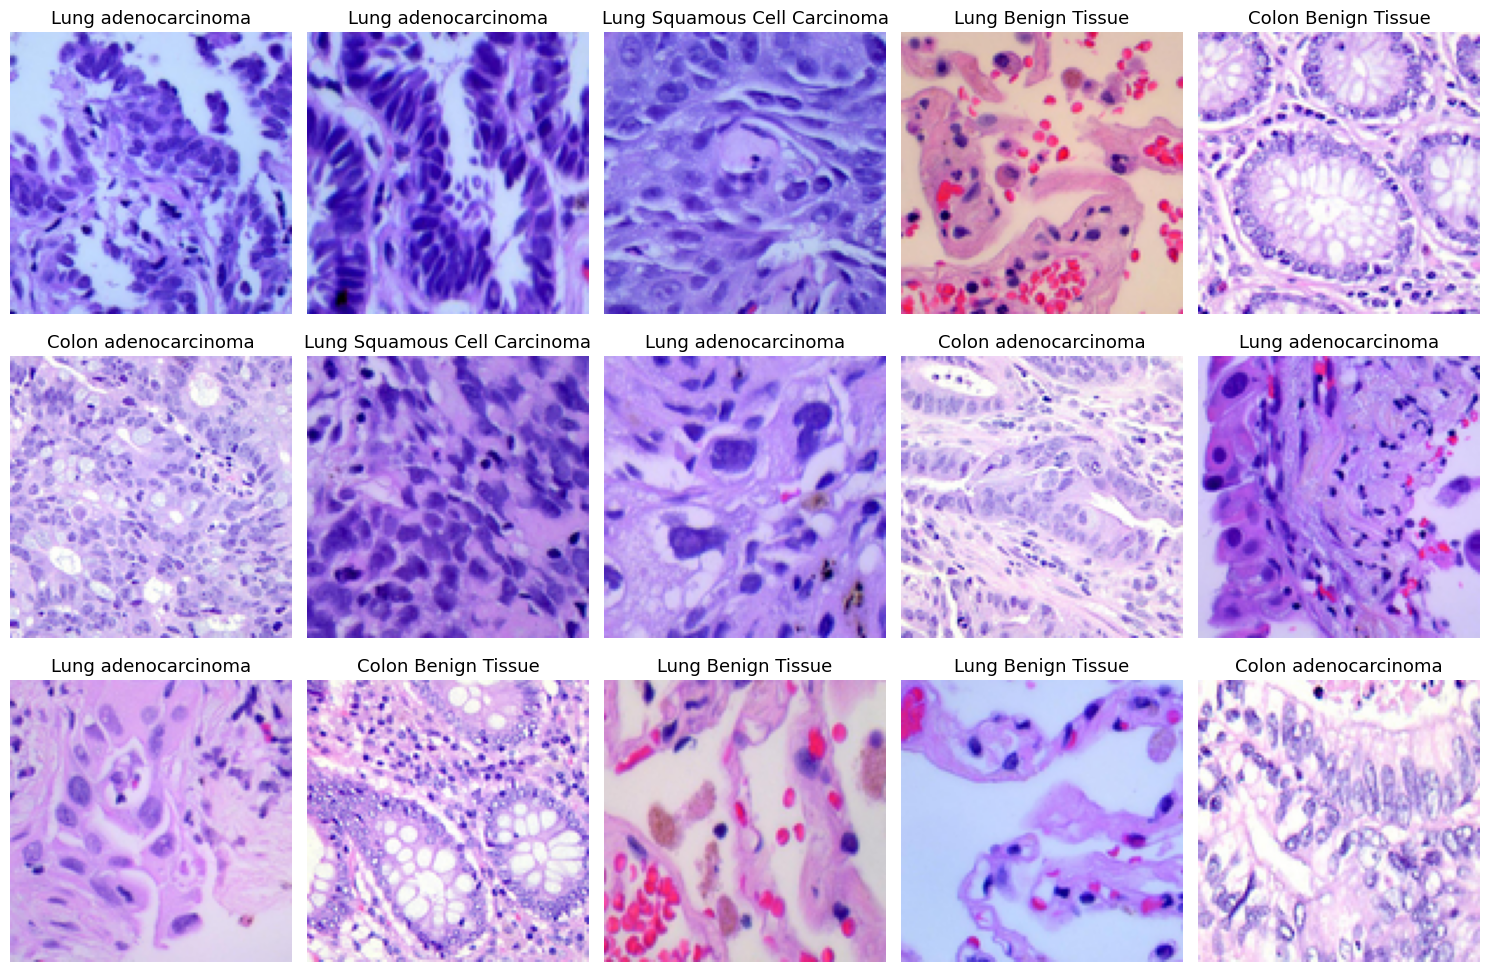

In [146]:
# Randomly select 15 samples from dataset

sample_indices = random.sample(range(len(labels)), 15)
sample_images = image_matrix[sample_indices]
sample_labels = labels[sample_indices]

plt.figure(figsize=(15, 10))

for i, (image, label) in enumerate(zip(sample_images, sample_labels), 1):
    plt.subplot(3, 5, i)
    plt.imshow(image)
    plt.title(label,fontsize=13)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Visualizing Class Distribution

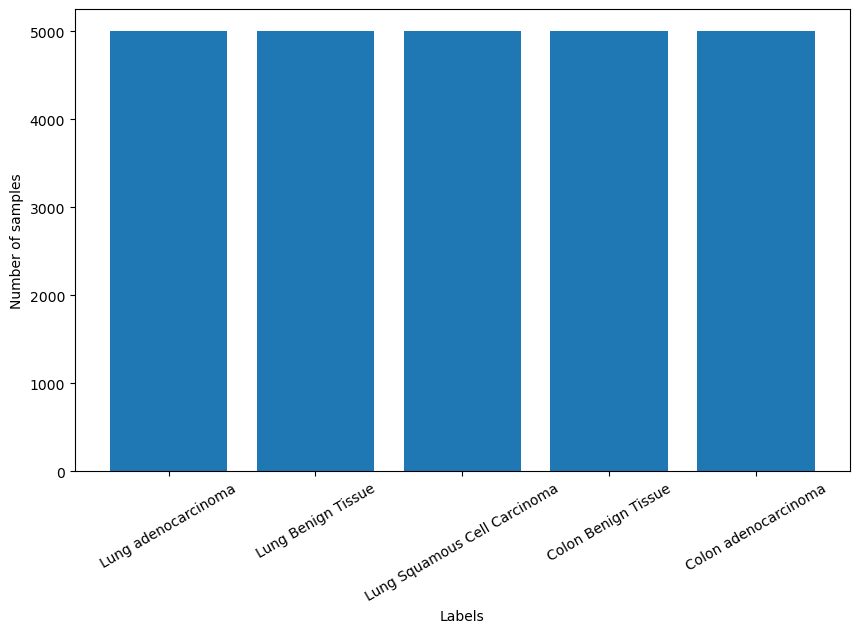

Lung adenocarcinoma             5000
Lung Benign Tissue              5000
Lung Squamous Cell Carcinoma    5000
Colon Benign Tissue             5000
Colon adenocarcinoma            5000
dtype: int64


In [45]:
# Bar plot for the class label distribution

labels_series = pd.Series(labels)
label_counts = labels_series.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Number of samples')
plt.xticks(rotation=30)
plt.show()

print(label_counts)

##Train-Test-Val Split

In [122]:
# Splitting into 60% of training data and 40% for testing and validation data with stratification

X_train, X_temp, y_train, y_temp = train_test_split(
    data, one_hot_labels, test_size=0.4, stratify=one_hot_labels, random_state=42)

# Splitting into testing and validation data
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [123]:
print(X_train.shape, X_val.shape, X_test.shape,y_train.shape,y_val.shape,y_test.shape)
print(str(y_train.shape[0]) + ' train samples')
print(str(y_val.shape[0]) + ' validation samples')
print(str(y_val.shape[0]) + ' test samples')

(15000, 120, 120, 3) (5000, 120, 120, 3) (5000, 120, 120, 3) (15000, 5) (5000, 5) (5000, 5)
15000 train samples
5000 validation samples
5000 test samples


# Evaluation Functions

Since you will use the same evaluation functions several times ( to evaluate the baseline, enhanced and transfer learning models), it is better to prepare the standardized functions to calculate them each time in the same way.

In [124]:
## LOSS-ACC GRAPHS

import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel, figsize=(6, 4)):
    ''' Plots a list of vectors.

    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)

    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()

In [125]:
# ROC curves

def plot_roc_curve(y_val, y_val_pred_probs, title):
    
    n_classes = y_val.shape[1]
    fpr, tpr, roc_auc = dict(), dict(), dict()

    # fpr and tpr
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_val_pred_probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def roc_curve_values(y_val, y_val_pred_probs):
    
    n_classes = y_val.shape[1]
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_val_pred_probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

In [126]:
# Confusion matrix

def plot_confusion_matrix(y_true, y_pred, title):
    
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()
    
def class_repo(y_true, y_pred):
    
    report = classification_report(y_true, y_pred)
    print(report)
    
    acc = accuracy_score(y_true, y_pred)
    print('Test accuracy: %.3f' % (acc))

# Baseline Model

In [175]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
# 128 and 64 filter with 3*3，activation：relu
model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 128 and 32 units and relu activation
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Add the last Dense layer
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_161 (Conv2D)         (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_161 (MaxPool  (None, 60, 60, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_162 (Conv2D)         (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_162 (MaxPool  (None, 30, 30, 64)        0         
 ing2D)                                                          
                                                                 
 flatten_86 (Flatten)        (None, 57600)             0         
                                                                 
 dense_252 (Dense)           (None, 128)             

In [176]:
# model setting and validation

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

Epoch 1/10
469/469 [==============================] - 140s 293ms/step - loss: 6.2949 - accuracy: 0.4853 - val_loss: 0.6823 - val_accuracy: 0.6882
Epoch 2/10
469/469 [==============================] - 138s 294ms/step - loss: 0.6700 - accuracy: 0.6789 - val_loss: 0.5992 - val_accuracy: 0.7246
Epoch 3/10
469/469 [==============================] - 137s 292ms/step - loss: 0.5709 - accuracy: 0.7295 - val_loss: 0.6048 - val_accuracy: 0.7270
Epoch 4/10
469/469 [==============================] - 140s 298ms/step - loss: 0.5026 - accuracy: 0.7607 - val_loss: 0.5801 - val_accuracy: 0.7400
Epoch 5/10
469/469 [==============================] - 140s 298ms/step - loss: 0.4835 - accuracy: 0.7736 - val_loss: 0.5705 - val_accuracy: 0.7564
Epoch 6/10
469/469 [==============================] - 138s 295ms/step - loss: 0.4463 - accuracy: 0.7926 - val_loss: 0.5621 - val_accuracy: 0.7526
Epoch 7/10
469/469 [==============================] - 138s 295ms/step - loss: 0.4289 - accuracy: 0.8030 - val_loss: 0.6142 -

In [178]:
# Convert one-hot encoded to class labels
y_val_true = np.argmax(y_val, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Predict probabilities for validation and test sets
y_val_pred_probs = model.predict(X_val)
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

157/157 [==============================] - 14s 92ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


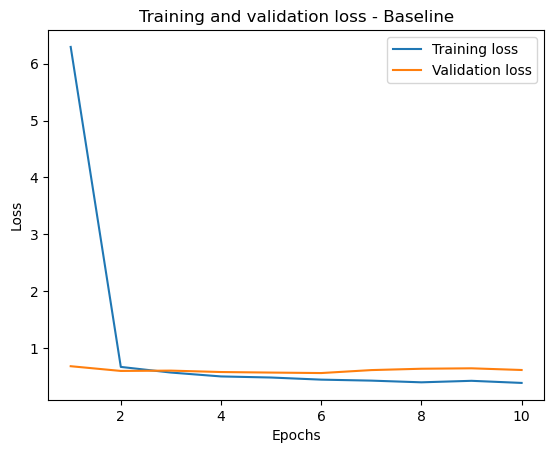

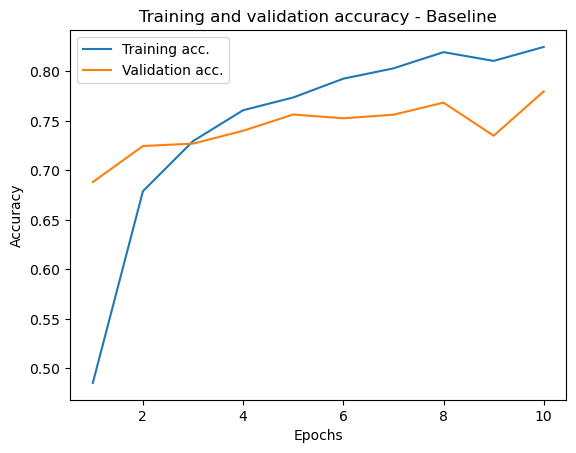

In [177]:
# LOSS-ACC GRAPHS for baseline

history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss - Baseline',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy - Baseline',
             ylabel='Accuracy')

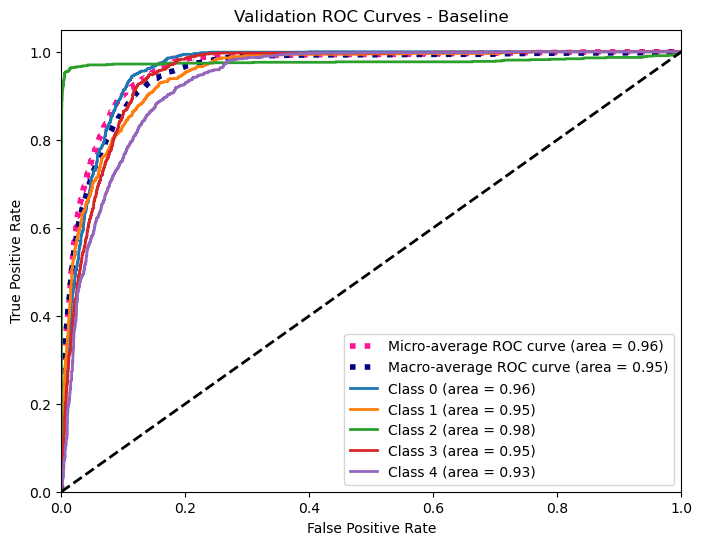

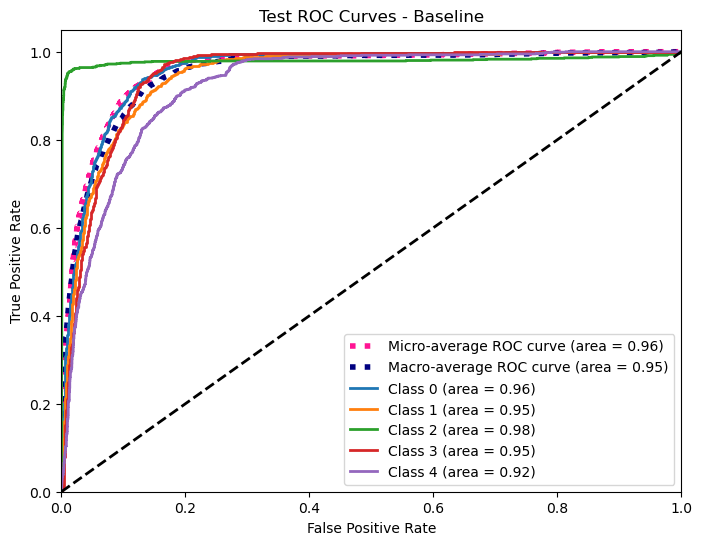

In [179]:
# ROC curve for baseline
plot_roc_curve(y_val, y_val_pred_probs, "Validation ROC Curves - Baseline")
plot_roc_curve(y_test, y_test_pred_probs, "Test ROC Curves - Baseline")

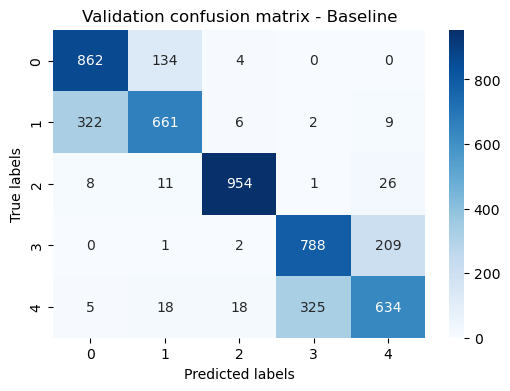

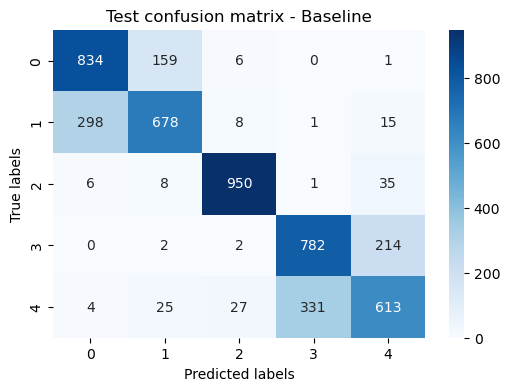

In [180]:
# Confusion matrix for baseline
plot_confusion_matrix(y_val_true,y_val_pred,"Validation confusion matrix - Baseline")
plot_confusion_matrix(y_test_true,y_test_pred,"Test confusion matrix - Baseline")

In [181]:
# Performance measures for baseline

confusion_matrix_value(y_val_true, y_val_pred)
confusion_matrix_value(y_test_true, y_test_pred)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1000
           1       0.80      0.66      0.72      1000
           2       0.97      0.95      0.96      1000
           3       0.71      0.79      0.74      1000
           4       0.72      0.63      0.68      1000

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000

Test accuracy: 0.780
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1000
           1       0.78      0.68      0.72      1000
           2       0.96      0.95      0.95      1000
           3       0.70      0.78      0.74      1000
           4       0.70      0.61      0.65      1000

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000

T

# Enhanced Model

157/157 [==============================] - 17s 106ms/step - loss: 0.9135 - accuracy: 0.8124
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


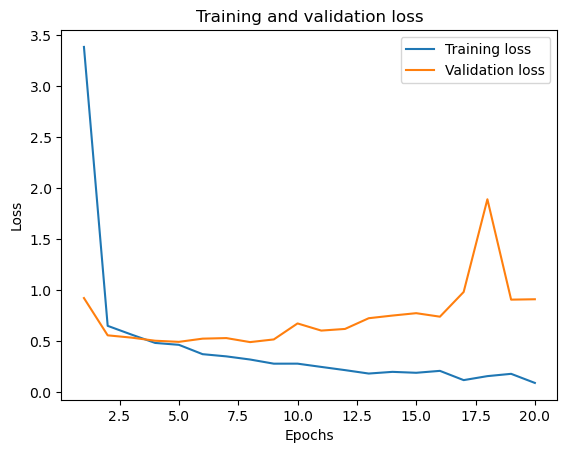

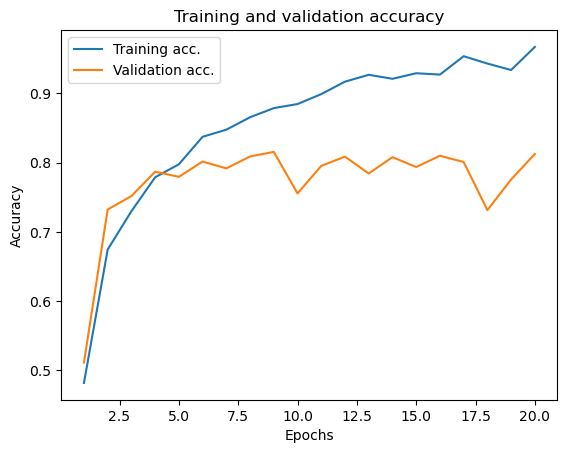

In [184]:
# Tried epochs = 20

model = Sequential()

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0,validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)


# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

157/157 [==============================] - 14s 89ms/step - loss: 0.7955 - accuracy: 0.7342
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


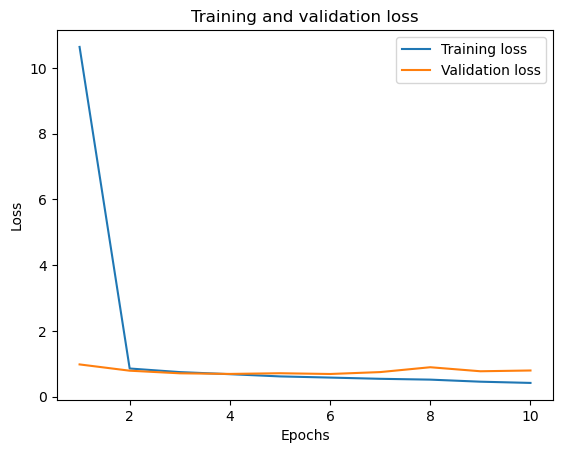

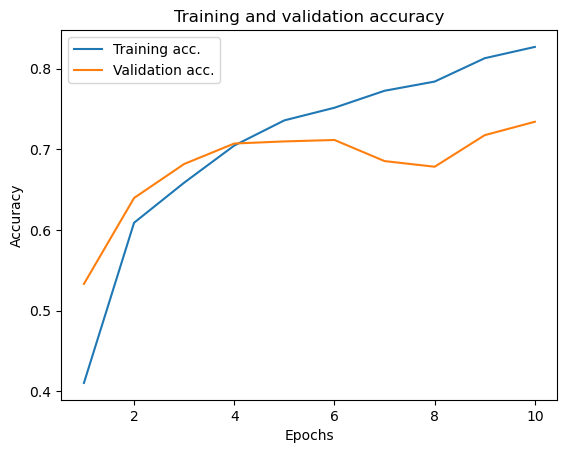

In [185]:
# Tried batch_size = 64

model = Sequential()

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0,validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)


# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

157/157 [==============================] - 5s 33ms/step - loss: 0.5664 - accuracy: 0.8256
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


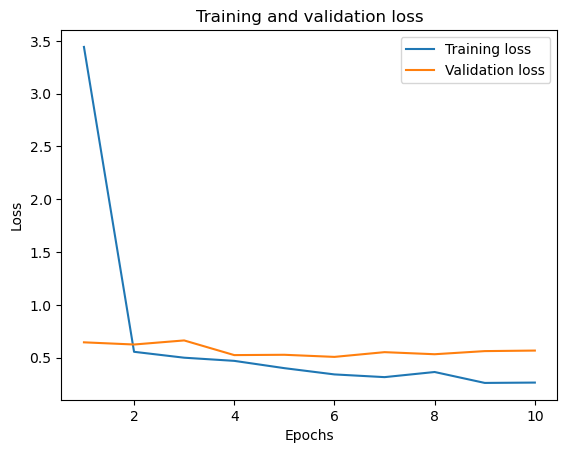

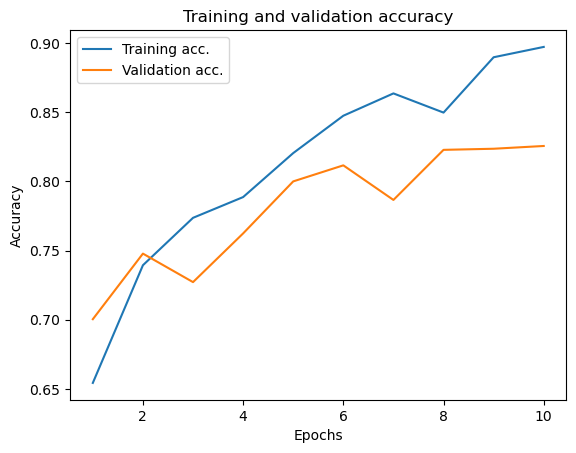

157/157 [==============================] - 3s 17ms/step - loss: 0.6904 - accuracy: 0.8188
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


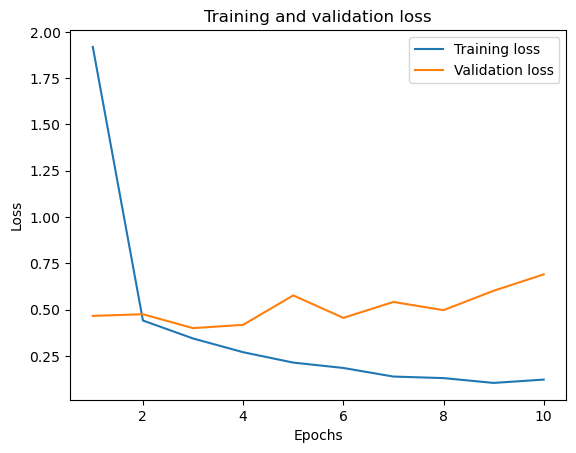

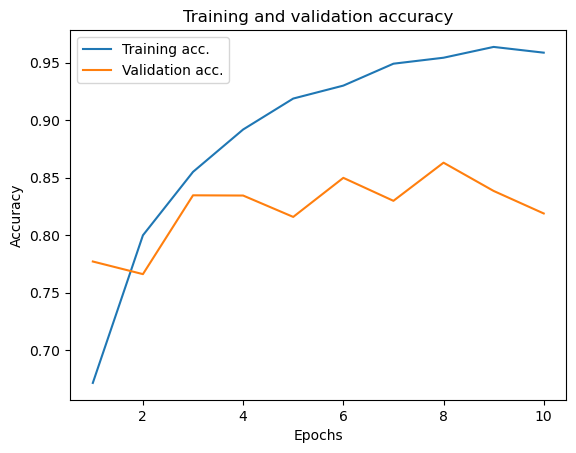

In [111]:
# First improvement, filters = 64,32 (selected)

# check possible numbers of filters: 64,32 and 32,16

# 64,32

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0,validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)


# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


#32,16

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0,validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)


# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 5s 32ms/step - loss: 0.6066 - accuracy: 0.7922


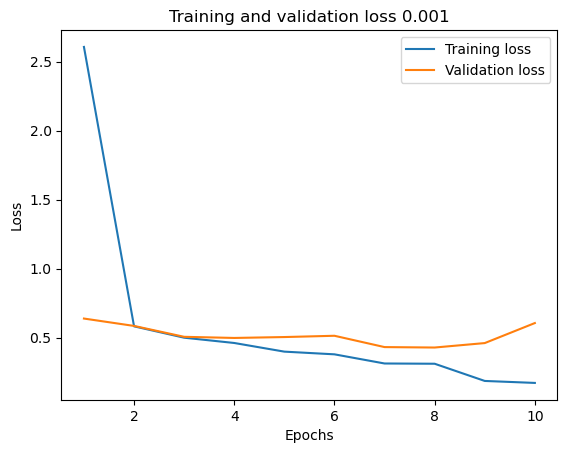

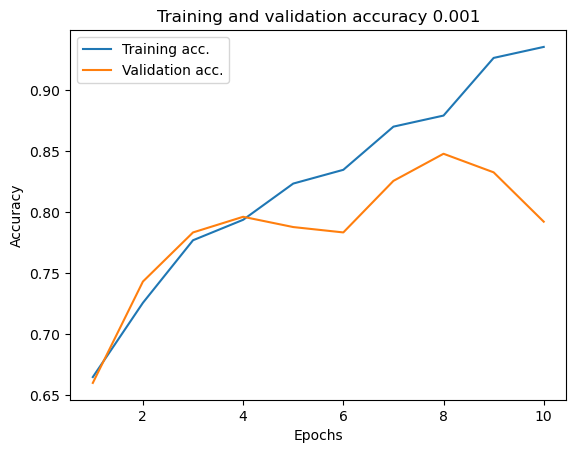

157/157 [==============================] - 5s 33ms/step - loss: 0.6518 - accuracy: 0.8294


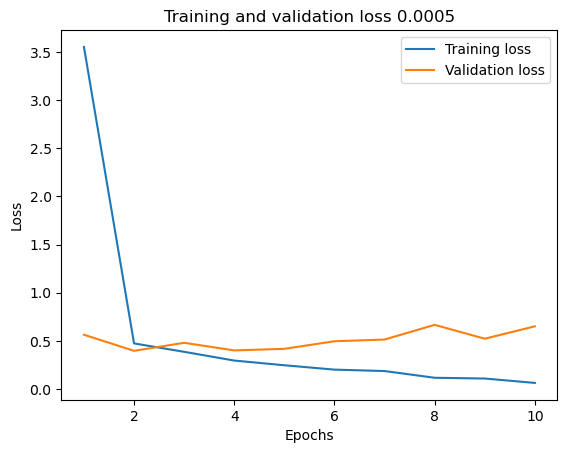

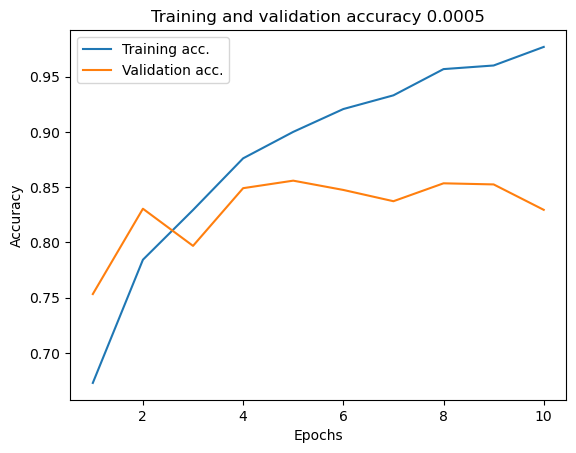

157/157 [==============================] - 5s 32ms/step - loss: 1.6103 - accuracy: 0.2000
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


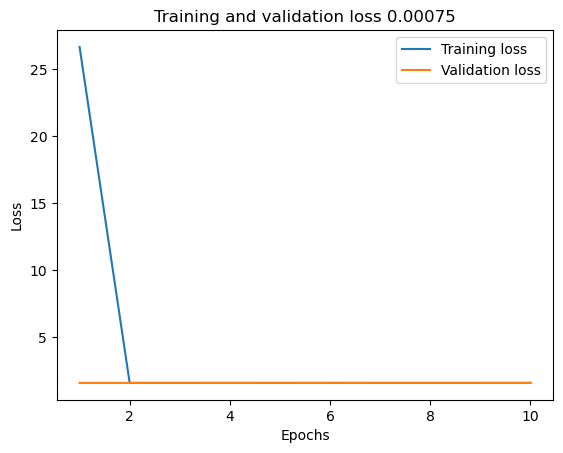

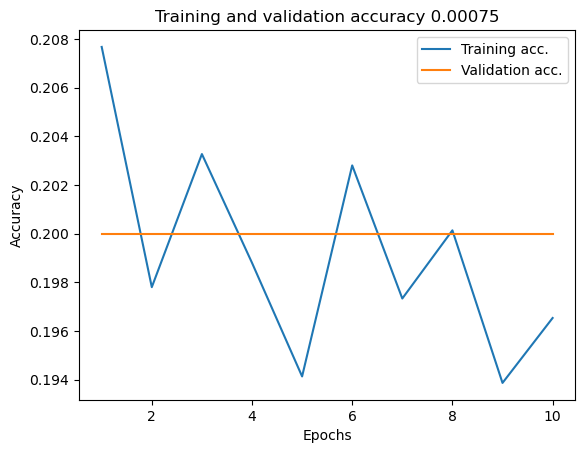

In [114]:
# Second improvement learning rate = 0.0005 (selected)

# Tried 0.001, worse, then tried 0,0005 and 0.00075.

# learning rate = 0.001

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss 0.001',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy 0.001',
             ylabel='Accuracy')

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss 0.0005',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy 0.0005',
             ylabel='Accuracy')


# learning rate = 0.0075

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0075)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss 0.00075',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy 0.00075',
             ylabel='Accuracy')

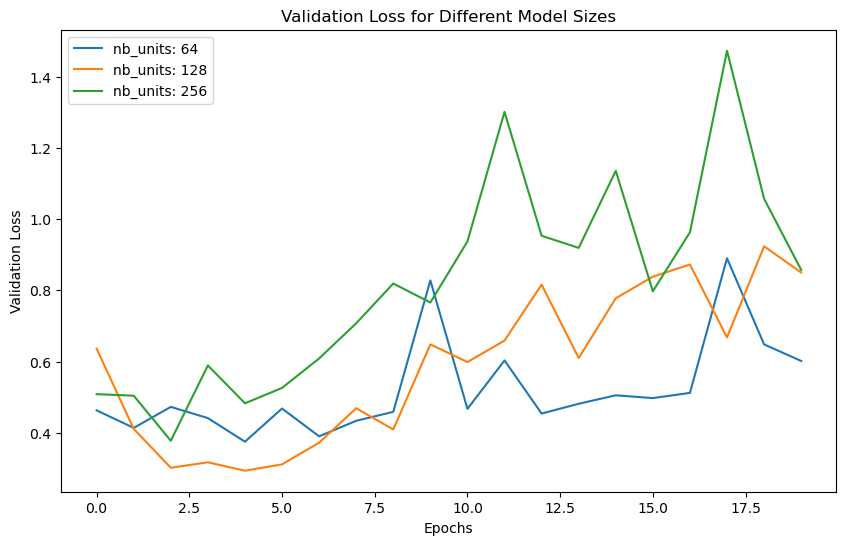

In [182]:
# Comparing 1st layer with 64, 128, 256,  2nd dense layer = 32

# For checking the further performance, setting epochs = 20

# 64,32 is the best

def build_model(input_shape, nb_units):
    model = Sequential([
        layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(nb_units, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model

validation_losses = {}

nb_units_options = [64, 128, 256]  # Possible nb_units values
input_shape = X_train.shape[1:] 

for nb_units in nb_units_options:
    model = build_model(input_shape, nb_units)
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    validation_losses[nb_units] = history.history['val_loss']

# LOSS-ACC GRAPHS
plt.figure(figsize=(10, 6))

for nb_units, val_loss in validation_losses.items():
    plt.plot(val_loss, label=f'nb_units: {nb_units}')

plt.title('Validation Loss for Different Model Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


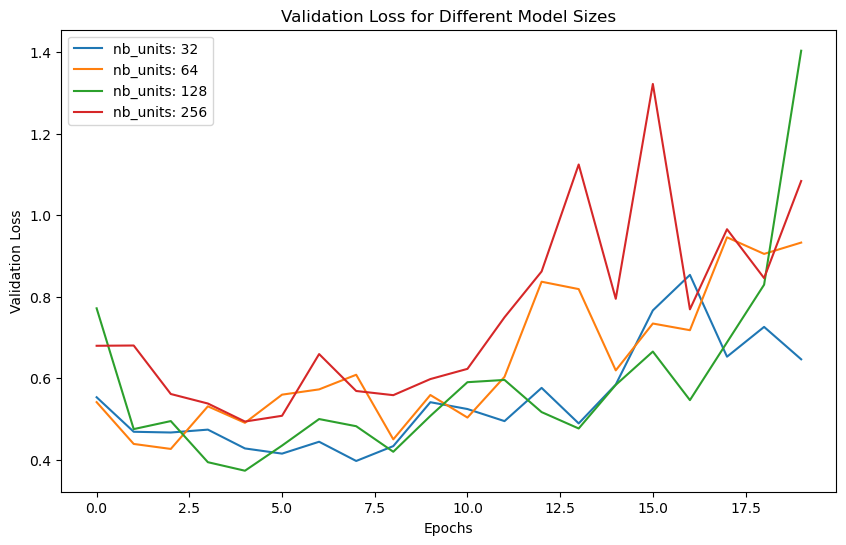

In [116]:
# Comparing 1st layer with 32, 64, 128, 256,  2nd dense layer = 16, epochs = 20

# 32,16 is the best

def build_model(input_shape, nb_units):
    model = Sequential([
        layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(nb_units, activation='relu'), 
        layers.Dense(16, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model

validation_losses = {}

nb_units_options = [32, 64, 128, 256]  # Possible nb_units values
input_shape = X_train.shape[1:] 

for nb_units in nb_units_options:
    model = build_model(input_shape, nb_units)
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    validation_losses[nb_units] = history.history['val_loss']

# LOSS-ACC GRAPHS
plt.figure(figsize=(10, 6))

for nb_units, val_loss in validation_losses.items():
    plt.plot(val_loss, label=f'nb_units: {nb_units}')

plt.title('Validation Loss for Different Model Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


157/157 [==============================] - 5s 34ms/step - loss: 0.5419 - accuracy: 0.8392
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


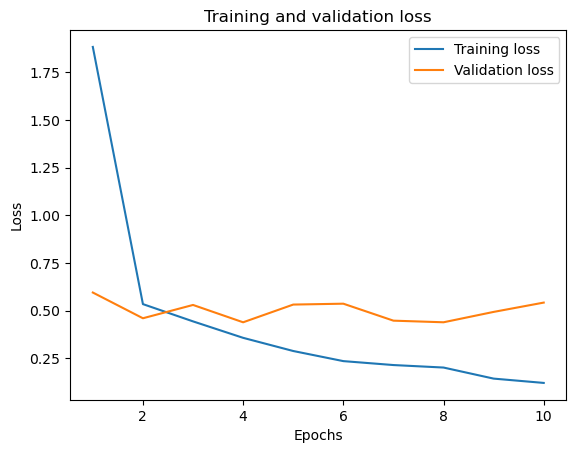

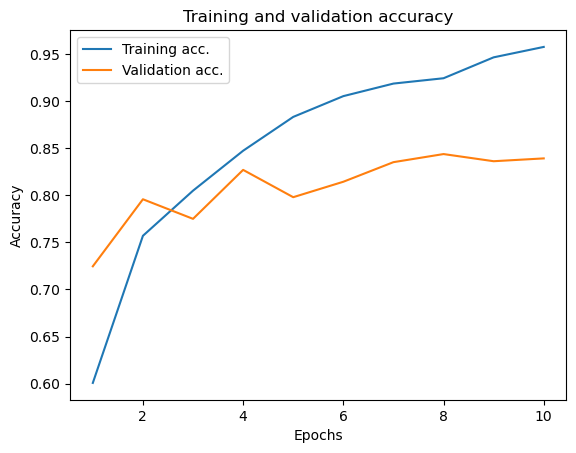

In [129]:
# Dense layers to 32,16

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 5s 33ms/step - loss: 0.5385 - accuracy: 0.8416
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


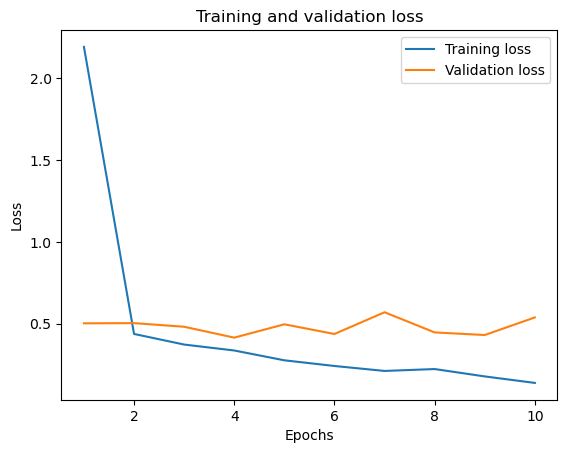

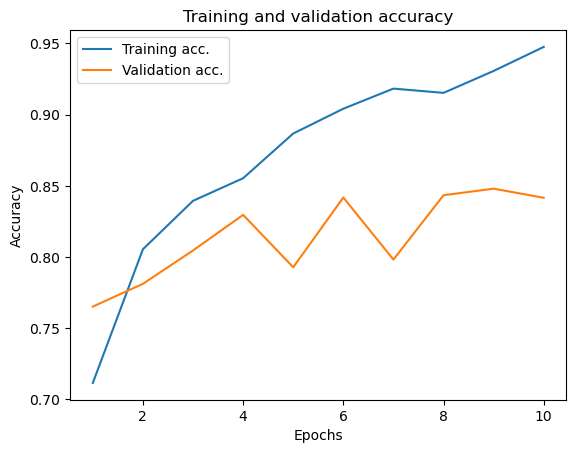

In [130]:
# 3nd improvement, dense layers to 64,32 is better (selected)

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


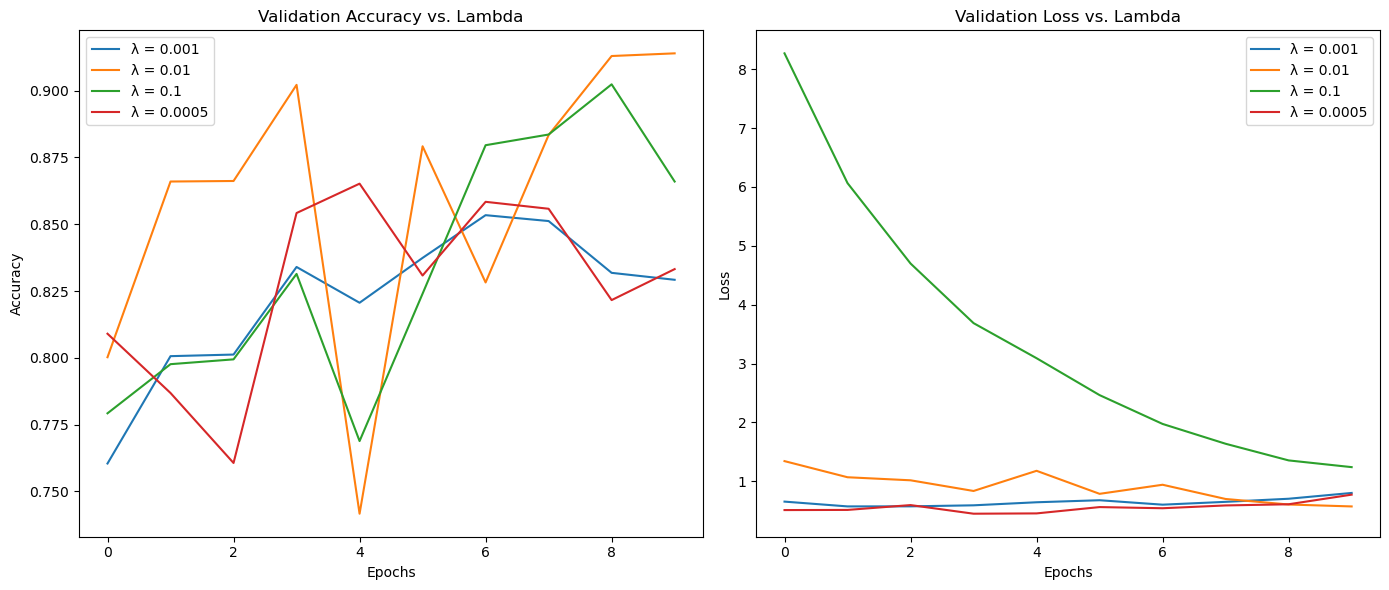

In [131]:
# Comparing different values of regularization

def build_model(lmbd):
    model = Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(lmbd)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', kernel_regularizer=l2(lmbd)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(lmbd)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=l2(lmbd)))
    model.add(layers.Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

lambdas = [0.001, 0.01, 0.1, 0.0005]
val_acc_history = []
val_loss_history = []

for lmbd in lambdas:
    model = build_model(lmbd)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_acc_history.append(history.history['val_accuracy'])
    val_loss_history.append(history.history['val_loss'])
#   print(f"λ = {lmbd}: Validation Accuracy = {history.history['val_accuracy'][-1]}, Validation Loss = {history.history['val_loss'][-1]}")

# Plot

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, lmbd in enumerate(lambdas):
    plt.plot(val_acc_history[i], label=f'λ = {lmbd}')
plt.title('Validation Accuracy vs. Lambda')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for i, lmbd in enumerate(lambdas):
    plt.plot(val_loss_history[i], label=f'λ = {lmbd}')
plt.title('Validation Loss vs. Lambda')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


157/157 [==============================] - 6s 35ms/step - loss: 0.7041 - accuracy: 0.8382
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


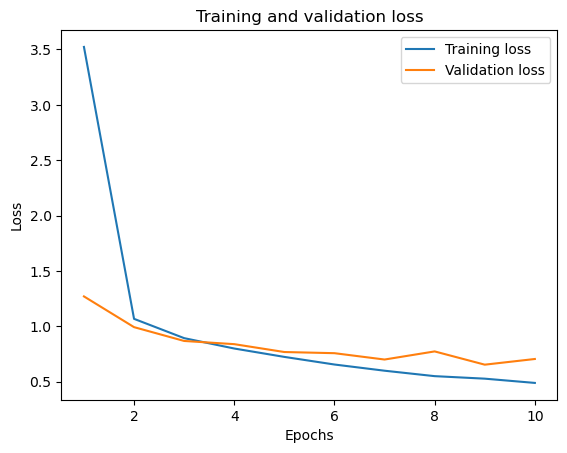

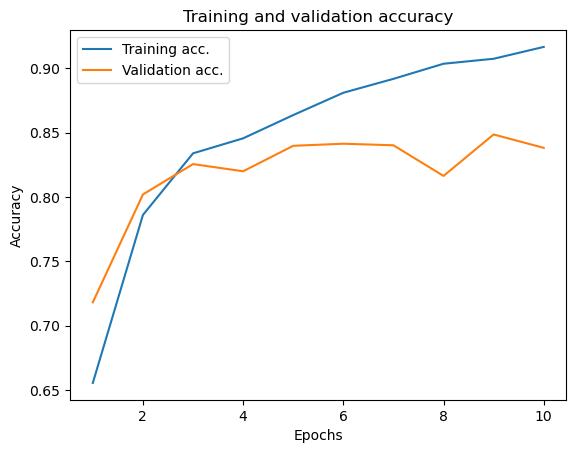

In [132]:
# L2 = 0.01

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 5s 32ms/step - loss: 0.6790 - accuracy: 0.8902
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


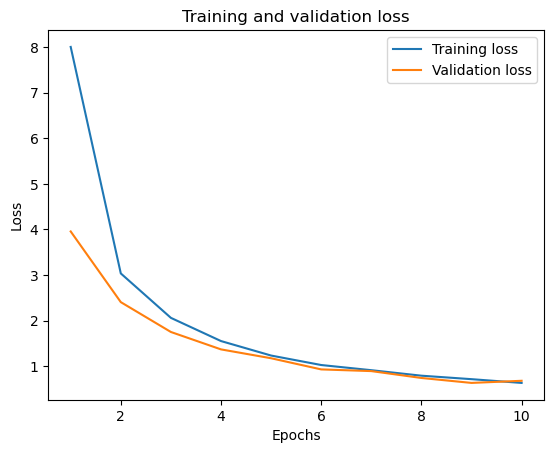

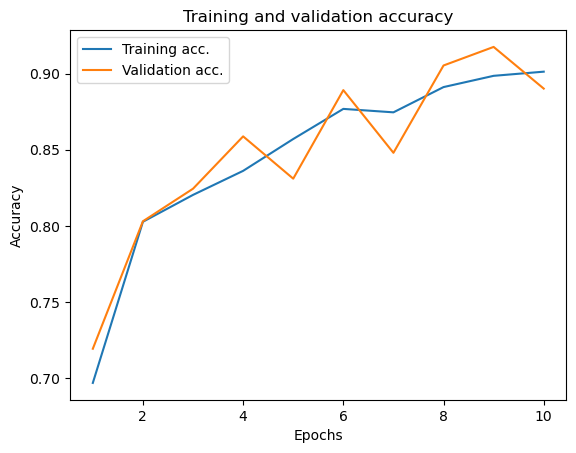

In [133]:
# L2 = 0.1

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.1)))
model.add(layers.Dense(32, activation='relu',kernel_regularizer=l2(0.1)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

157/157 [==============================] - 5s 30ms/step - loss: 0.6439 - accuracy: 0.8964
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


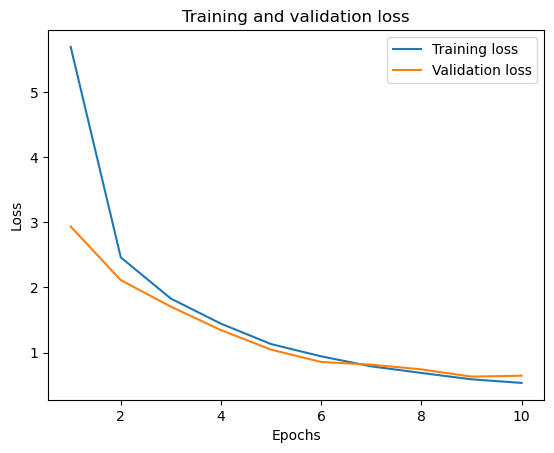

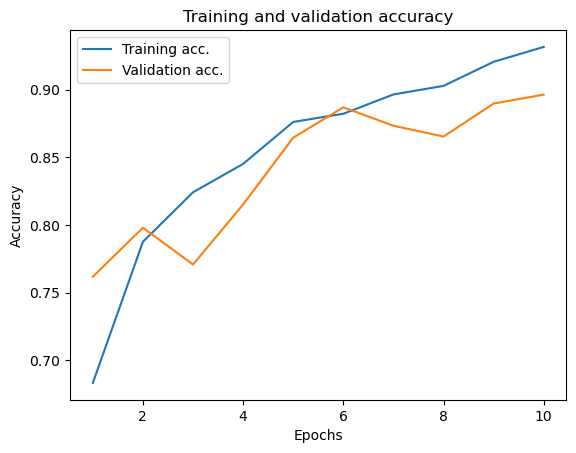

In [134]:
# 4th improvement, L2 = 0.05 (selected)

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='relu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

157/157 [==============================] - 6s 37ms/step - loss: 0.5381 - accuracy: 0.9166
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


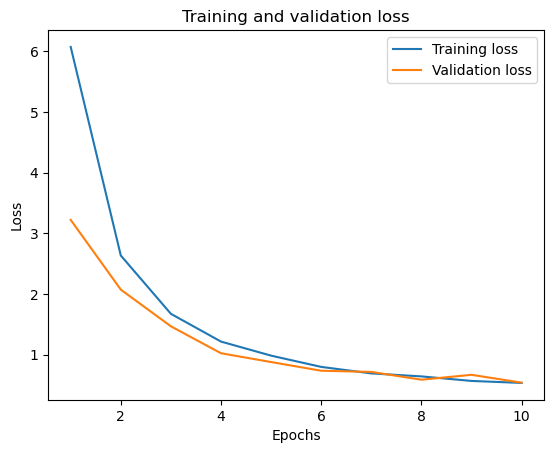

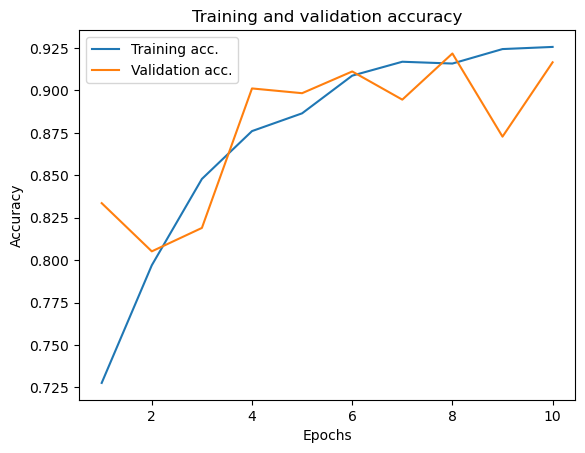

In [139]:
# 5th improvement changed activation to elu for CNN and dense layers (selected)

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 6s 37ms/step - loss: 0.7500 - accuracy: 0.9018
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


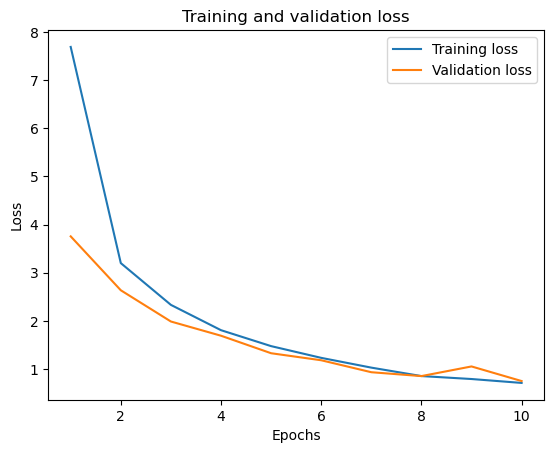

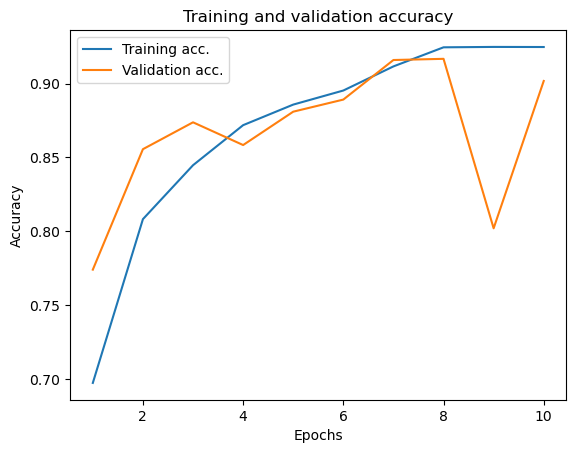

In [138]:
# Only change activation of CNN only to elu

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='relu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 6s 37ms/step - loss: 1.5302 - accuracy: 0.4640
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


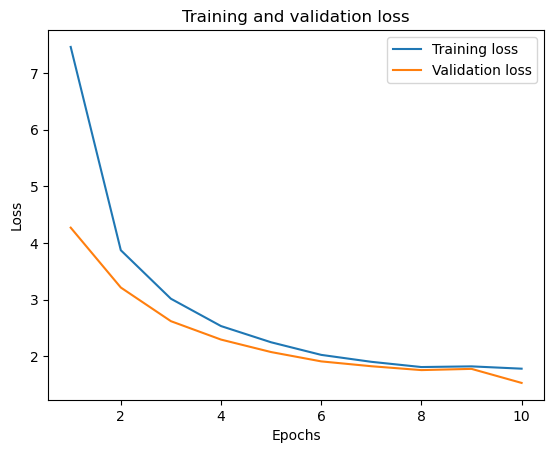

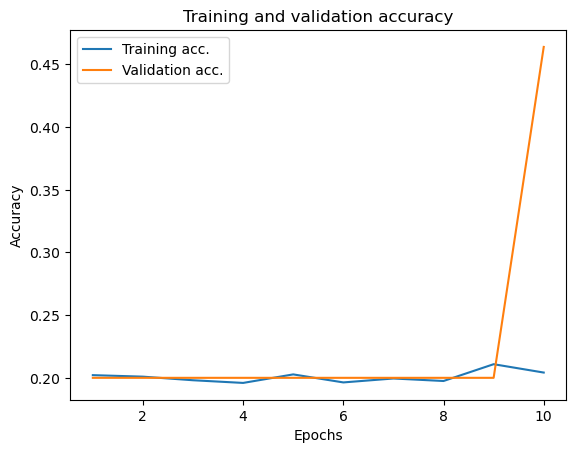

157/157 [==============================] - 6s 36ms/step - loss: 1.7050 - accuracy: 0.2000
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


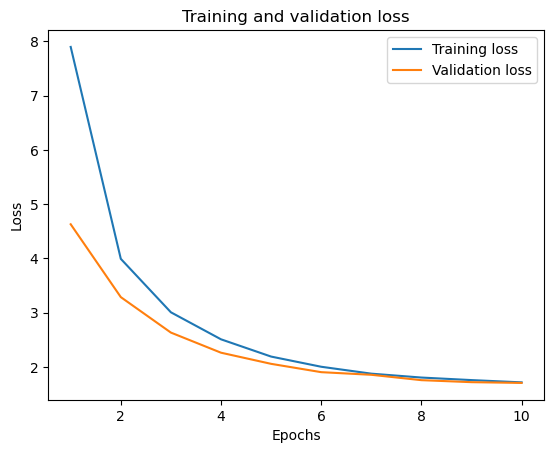

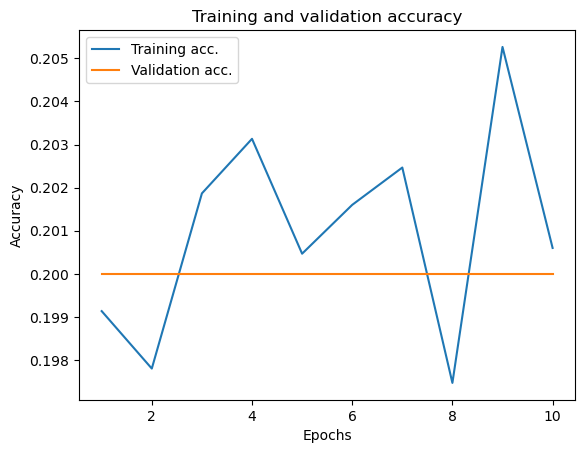

157/157 [==============================] - 6s 37ms/step - loss: 0.6760 - accuracy: 0.8822
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


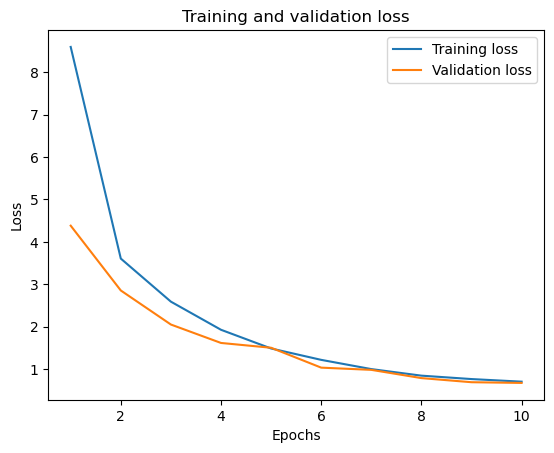

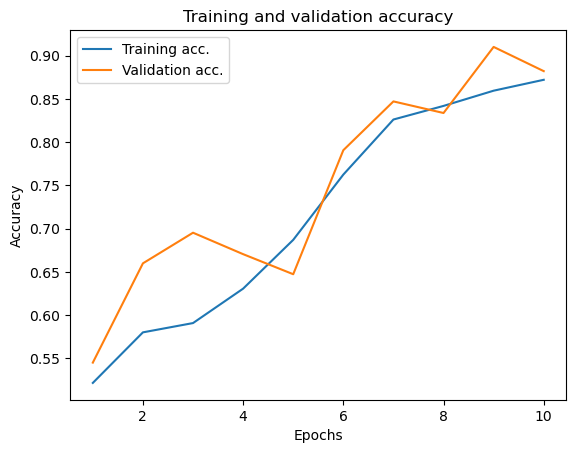

In [140]:
# 6th improvement. Have tried different dropout rates, 0.5, 0.3, 0.1, but worse results, won't use the dropout.

# 0.4

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

# 0.3
model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

# 0.1
model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')


157/157 [==============================] - 4s 25ms/step - loss: 0.3711 - accuracy: 0.9402
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


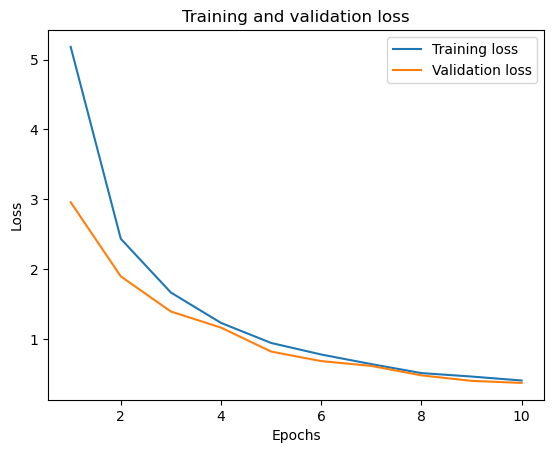

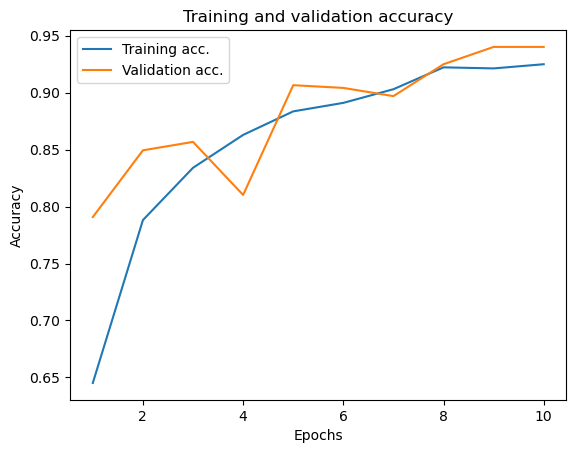

In [141]:
# Tried the hyperparameter from publications, changed the MaxPooling to 3*3 (selected)

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

157/157 [==============================] - 4s 27ms/step - loss: 0.4779 - accuracy: 0.8658
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


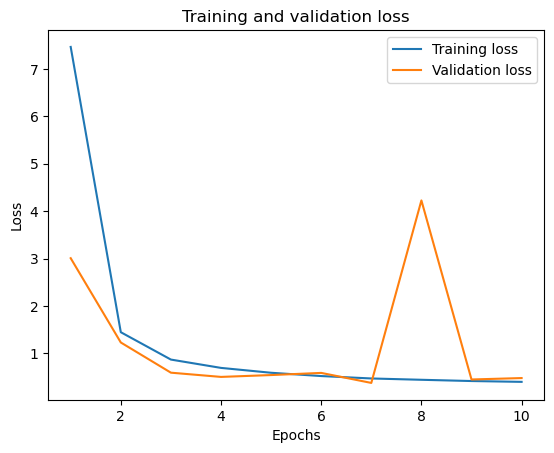

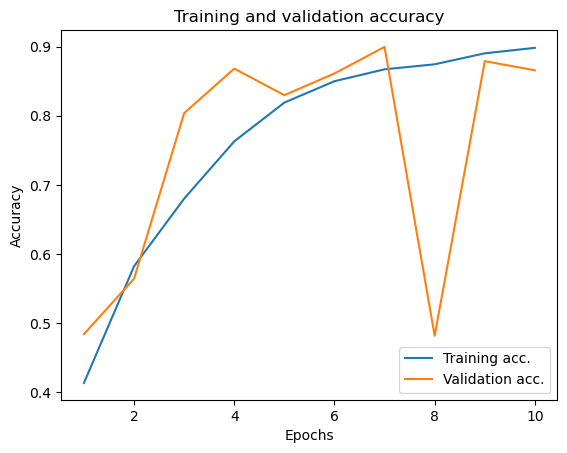

In [144]:
# Tried the hyperparameter tuning from reference, change the MaxPooling to 3*3 and optimizer to RMSprop

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer="RMSprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [159]:
# The final version of the enhanced Model

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='elu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(32, activation='elu',kernel_regularizer=l2(0.05)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

optimizer = Adam(learning_rate = 0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_val, y_val)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_159 (Conv2D)         (None, 120, 120, 64)      1792      
                                                                 
 max_pooling2d_159 (MaxPool  (None, 40, 40, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_160 (Conv2D)         (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_160 (MaxPool  (None, 13, 13, 32)        0         
 ing2D)                                                          
                                                                 
 flatten_84 (Flatten)        (None, 5408)              0         
                                                                 
 dense_247 (Dense)           (None, 64)              

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


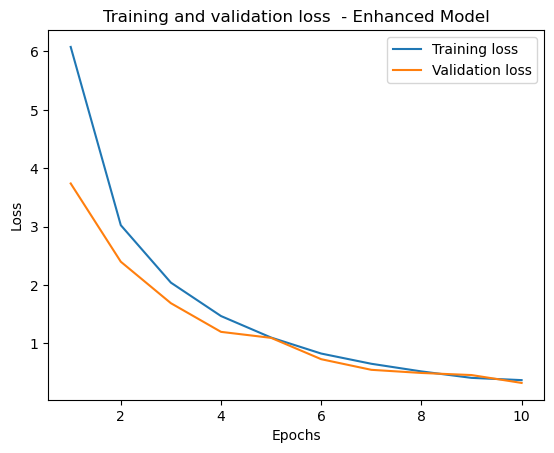

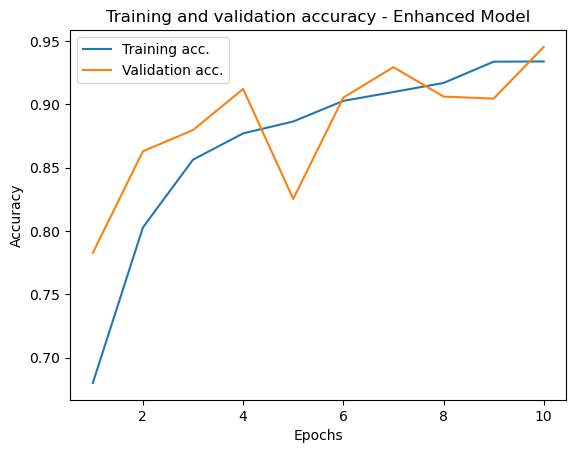

In [160]:
# LOSS-ACC GRAPHS
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss  - Enhanced Model',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy - Enhanced Model',
             ylabel='Accuracy')

In [161]:
# Convert one-hot encoded to class labels
y_val_true = np.argmax(y_val, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Predict probabilities for validation and test sets
y_val_pred_probs = model.predict(X_val)
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

157/157 [==============================] - 4s 24ms/step


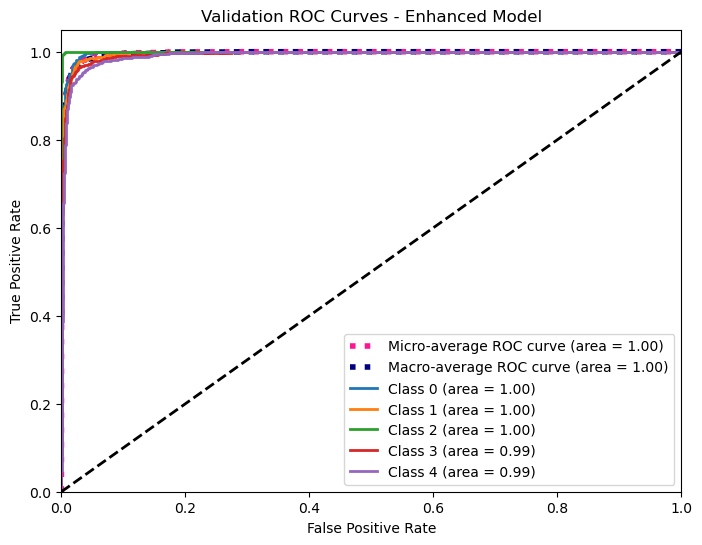

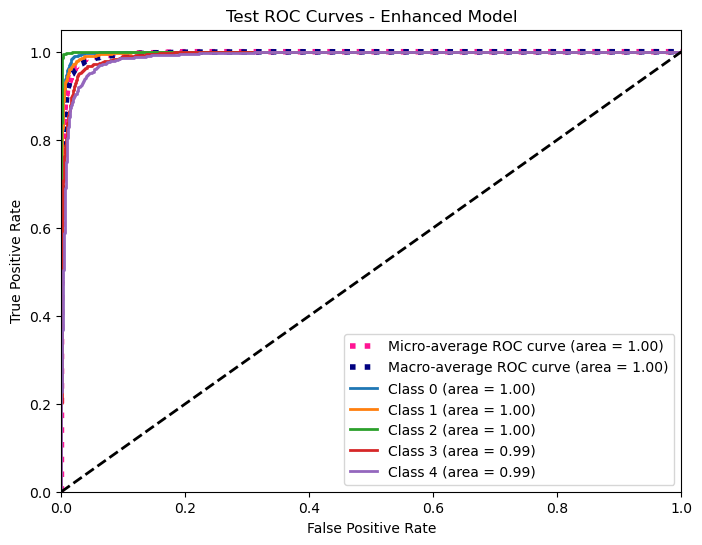

In [162]:
# ROC curve for enhanced model
plot_roc_curve(y_val, y_val_pred_probs, "Validation ROC Curves - Enhanced Model")
plot_roc_curve(y_test, y_test_pred_probs, "Test ROC Curves - Enhanced Model")

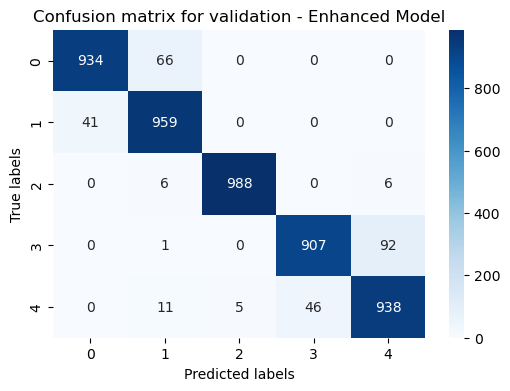

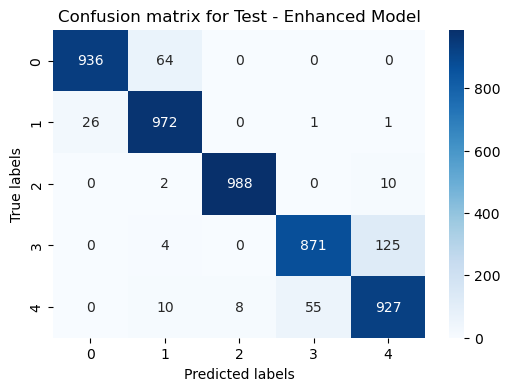

In [163]:
# Confusion matrix for enhanced model
plot_confusion_matrix(y_val_true,y_val_pred,"Confusion matrix for validation - Enhanced Model")
plot_confusion_matrix(y_test_true,y_test_pred,"Confusion matrix for Test - Enhanced Model")

In [164]:
# Performance measures for enhanced model

confusion_matrix_value(y_val_true, y_val_pred)
confusion_matrix_value(y_test_true, y_test_pred)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1000
           1       0.92      0.96      0.94      1000
           2       0.99      0.99      0.99      1000
           3       0.95      0.91      0.93      1000
           4       0.91      0.94      0.92      1000

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

Test accuracy: 0.945
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1000
           1       0.92      0.97      0.95      1000
           2       0.99      0.99      0.99      1000
           3       0.94      0.87      0.90      1000
           4       0.87      0.93      0.90      1000

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

T

# Transfer Learning Model


In [165]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # You can add more layers if needed
x = Dense(5, activation='softmax')(x)  # Adjust the number of outputs for your dataset

# Compile the new model
model_VGG16 = Model(inputs=base_model.input, outputs=x)
model_VGG16.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_VGG16 = model_VGG16.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
469/469 [==============================] - 461s 982ms/step - loss: 0.8447 - accuracy: 0.8827 - val_loss: 0.2563 - val_accuracy: 0.9494
Epoch 2/10
469/469 [==============================] - 465s 993ms/step - loss: 0.1173 - accuracy: 0.9715 - val_loss: 0.2269 - val_accuracy: 0.9540
Epoch 3/10
469/469 [==============================] - 467s 996ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.2047 - val_accuracy: 0.9620
Epoch 4/10
469/469 [==============================] - 480s 1s/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.2034 - val_accuracy: 0.9648
Epoch 5/10
469/469 [==============================] - 471s 1s/step - loss: 0.0170 - accuracy: 0.9936 - val_loss: 0.2261 - val_accuracy: 0.9620
Epoch 6/10
469/469 [==============================] - 478s 1s/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.1960 - val_accuracy: 0.9658
Epoch 7/10
469/469 [==============================] - 480s 1s/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.1961 - val_accurac

In [167]:
test_loss, test_acc = model_VGG16.evaluate(X_val, y_val)


157/157 [==============================] - 117s 745ms/step - loss: 0.2251 - accuracy: 0.9686


In [166]:
# Convert one-hot encoded to class labels
y_val_true = np.argmax(y_val, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Predict probabilities for validation and test sets
y_val_pred_probs = model_VGG16.predict(X_val)
y_test_pred_probs = model_VGG16.predict(X_test)

# Convert probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

157/157 [==============================] - 122s 778ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


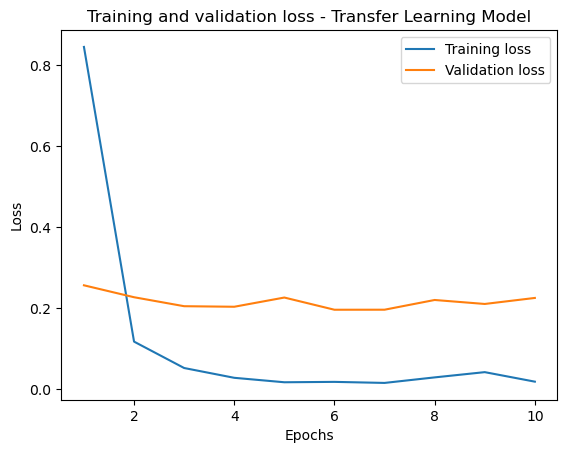

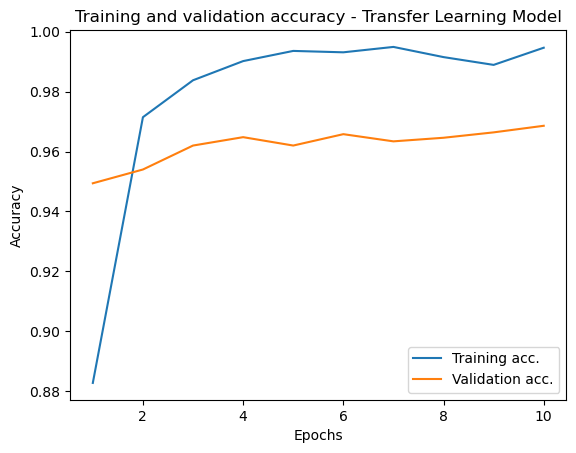

In [170]:
# LOSS-ACC GRAPHS for Transfer Learning Model model
history_dict = history_VGG16.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss - Transfer Learning Model',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy - Transfer Learning Model',
             ylabel='Accuracy')

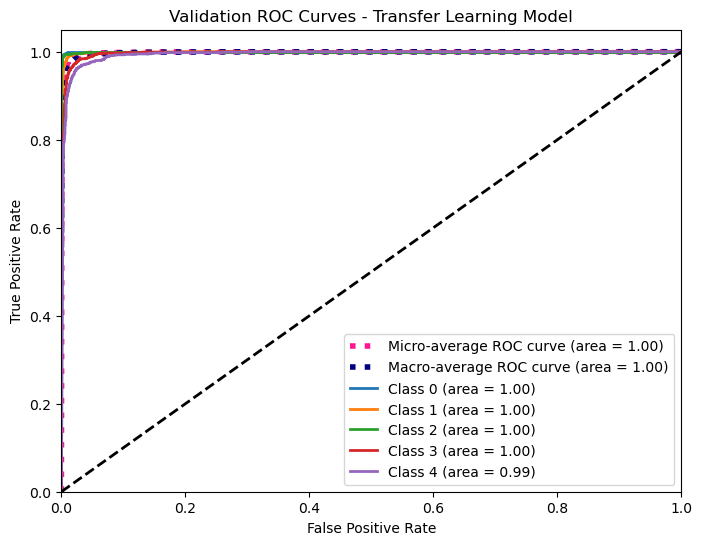

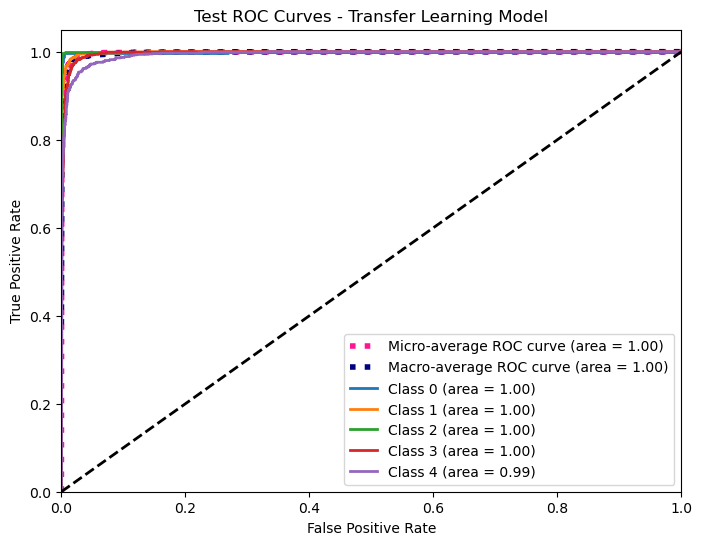

In [171]:
# ROC curve for Transfer Learning Model model
plot_roc_curve(y_val, y_val_pred_probs, "Validation ROC Curves - Transfer Learning Model")
plot_roc_curve(y_test, y_test_pred_probs, "Test ROC Curves - Transfer Learning Model")

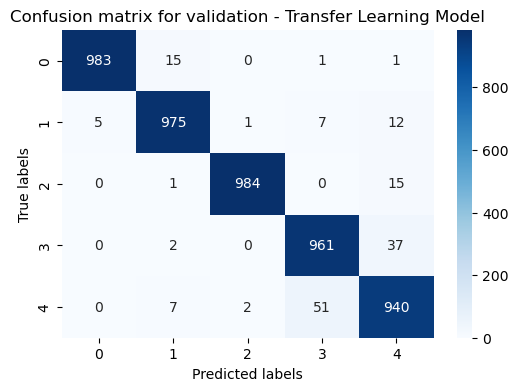

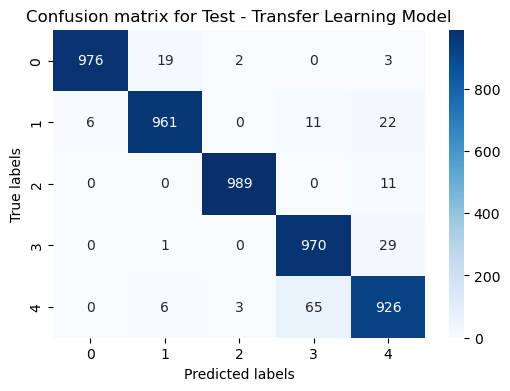

In [172]:
# Confusion matrix for Transfer Learning Model model
plot_confusion_matrix(y_val_true,y_val_pred,"Confusion matrix for validation - Transfer Learning Model")
plot_confusion_matrix(y_test_true,y_test_pred,"Confusion matrix for Test - Transfer Learning Model")

In [174]:
# Performance measures for Transfer Learning Model model
confusion_matrix_value(y_val_true, y_val_pred)
confusion_matrix_value(y_test_true, y_test_pred)
# model_performance(X_val, y_val, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.97      0.97      0.97      1000
           2       1.00      0.98      0.99      1000
           3       0.94      0.96      0.95      1000
           4       0.94      0.94      0.94      1000

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

Test accuracy: 0.969
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1000
           1       0.97      0.96      0.97      1000
           2       0.99      0.99      0.99      1000
           3       0.93      0.97      0.95      1000
           4       0.93      0.93      0.93      1000

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

T